**[Back to Fan's Intro Stat Table of Content](https://fanwangecon.github.io/Stat4Econ/)**

# Mean and Standard Deviation

Why do we need the standard deviation? We will demonstrate its usefulness by studying temperature dataset.

## The Temperature Dataset

This dataset covers a variety of cities in the United States across all States and Territories. For each city, we have the average temperature in each month. The unit of observation is at the city/month level. We have variables for the state, the city, the month and the average temperature.

**The dataset, *TempCitiesUSA.csv*, can be downloaded [here](../data/TempCitiesUSA.csv).**

In [19]:
# Load in Data Tools
# For Reading/Loading Data
library(tidyverse)
# Load in Data
df_temp <- read_csv('../data/TempCitiesUSA.csv')

Parsed with column specification:
cols(
  state = col_character(),
  city = col_character(),
  month = col_double(),
  temp.f = col_double()
)


## Listing Unique Levels for Categorical Variables in the Dataset

We can see that the state and city variables are string variables. We can show unique states and cities by months. In the program below, I append the number of observations for each category. 

From the tables below, we can see that each city has 12 observations (for the 12 months), and each state has multiple cities.

In [20]:
# A function that shows Unique Values for Categorical Variables in a Table format
show.unique.values <- function(df, cate.var.str, lvl_str_max_len=15){
    
    # Unique Categories
    unique.cates <- df %>% 
        group_by(!!sym(cate.var.str)) %>%
        summarise(freq = n()) %>%
        mutate(distinct_N = paste0(!!sym(cate.var.str), ' (n=', freq, ')')) %>%
        select(distinct_N)

    # At most 10 columns
    unique.count <- dim(unique.cates)[1]
    col.count <- min(ceiling(sqrt(unique.count)), 8)
    row.count <- ceiling(unique.count/col.count)

    # Generate Table to Fill in
    expand.length = row.count*col.count
    unique.cates.expand <- vector(mode = "character", length = expand.length)
    
    # Unique Categories and Counts
    unique.cates.shorter <- substring(t(unique.cates), first = 1, last = lvl_str_max_len)    
    unique.cates.expand[0:unique.count] <- unique.cates.shorter
    
    # Reshape
    dim(unique.cates.expand) <- c(row.count, col.count)

    # Show
    title <- sprintf("From Dataset: %s, %d unique Levels for: %s",
                     deparse(substitute(df)), unique.count, cate.var.str)
    return(list(title=title, 
           levels=unique.cates.expand))
}

In [21]:
# List of categorical Variables
cate.vars.list <- c('month', 'state', 'city')
lapply(cate.vars.list, show.unique.values, df = df_temp, lvl_str_max_len = 30)

[[1]]
[[1]]$title
[1] "From Dataset: df_temp, 12 unique Levels for: month"

[[1]]$levels
     [,1]        [,2]        [,3]        [,4]        
[1,] "1 (n=261)" "4 (n=261)" "7 (n=261)" "10 (n=261)"
[2,] "2 (n=261)" "5 (n=261)" "8 (n=261)" "11 (n=261)"
[3,] "3 (n=261)" "6 (n=261)" "9 (n=261)" "12 (n=261)"


[[2]]
[[2]]$title
[1] "From Dataset: df_temp, 59 unique Levels for: state"

[[2]]$levels
     [,1]                  [,2]          [,3]                
[1,] "AK (n=204)"          "CO (n=60)"   "ID (n=36)"         
[2,] "AL (n=36)"           "CT (n=24)"   "IL (n=48)"         
[3,] "AMER SAMOA (n=12)"   "D.C. (n=24)" "IN (n=48)"         
[4,] "AR (n=36)"           "DE (n=12)"   "KS (n=60)"         
[5,] "AZ (n=60)"           "FL (n=156)"  "KY (n=36)"         
[6,] "CA (n=180)"          "GA (n=60)"   "LA (n=48)"         
[7,] "CA. (n=12)"          "HI (n=36)"   "MA (n=36)"         
[8,] "CAROLINE IS. (n=12)" "IA (n=36)"   "MARSHALL IS (n=12)"
     [,4]                  [,5]         [,6]         [,7]         [,8]       
[1,] "MARSHALL IS. (n=12)" "NC (n=60)"  "OH (n=84)"  "SC (n=24)"  "WI (n=48)"
[2,] "MD (n=12)"           "ND (n=48)"  "OK (n=24)"  "SD (n=48)"  "WV (n=48)"
[3,] "ME (n=24)"           "NE (n=96)"  "OR (n=84)"  "TN (n=48)"  "WY (n=48)"
[4,] "MI (n=108)"          "NH (n=24)"  "PA (n=72)"  "TX (n=252)" ""         
[5,] "MN (n=60)"           "NJ (n=24)"  "PA. (n=12)" "UT (n=24)"  ""         
[6,] "MO (n=48)"           "NM (n=36)"  "PC (n=48)"  "VA (n=48)"  ""         
[7,] "MS (n=36)"           "NV (n=60)"  "PR (n=12)"  "VT (n=12)"  ""         
[8,] "MT (n=72)"           "NY (n=108)" "RI (n=12)"  "WA (n=72)"  ""         


[[3]]
[[3]]$title
[1] "From Dataset: df_temp, 254 unique Levels for: city"

[[3]]$levels
      [,1]                      [,2]                      
 [1,] "ABERDEEN (n=12)"         "BOSTON (n=12)"           
 [2,] "ABILENE (n=12)"          "BRIDGEPORT (n=12)"       
 [3,] "AKRON (n=12)"            "BROWNSVILLE (n=12)"      
 [4,] "ALAMOSA (n=12)"          "BUFFALO (n=12)"          
 [5,] "ALBANY (n=12)"           "BURLINGTON (n=12)"       
 [6,] "ALBUQUERQUE (n=12)"      "CAPE HATTERAS (n=12)"    
 [7,] "ALLENTOWN (n=12)"        "CARIBOU (n=12)"          
 [8,] "ALPENA (n=12)"           "CASPER (n=12)"           
 [9,] "AMARILLO (n=12)"         "CHARLESTON (n=12)"       
[10,] "ANCHORAGE (n=12)"        "CHARLOTTE (n=12)"        
[11,] "ANNETTE (n=12)"          "CHATTANOOGA (n=12)"      
[12,] "APALACHICOLA (n=12)"     "CHEYENNE (n=12)"         
[13,] "ASHEVILLE (n=12)"        "CLAYTON (n=12)"          
[14,] "ASTORIA (n=12)"          "CLEVELAND (n=12)"        
[15,] "ATHENS (n=12)"           "COLORADO SPRINGS (n=12)" 
[16,] "ATLANTA (n=12)"          "COLUMBIA (n=24)"         
[17,] "ATLANTIC CITY AP (n=12)" "COLUMBUS (n=24)"         
[18,] "AUSTIN/BERGSTROM (n=12)" "CONCORD (n=12)"          
[19,] "AUSTIN/CITY (n=12)"      "CONCORDIA (n=12)"        
[20,] "AVOCA (n=12)"            "CORPUS CHRISTI (n=12)"   
[21,] "BAKERSFIELD (n=12)"      "DALLAS-FORT WORTH (n=12)"
[22,] "BALTIMORE (n=12)"        "DALLAS-LOVE FIELD (n=12)"
[23,] "BARROW (n=12)"           "DAYTON (n=12)"           
[24,] "BATON ROUGE (n=12)"      "DAYTONA BEACH (n=12)"    
[25,] "BECKLEY (n=12)"          "DEL RIO (n=12)"          
[26,] "BETHEL (n=12)"           "DENVER (n=12)"           
[27,] "BILLINGS (n=12)"         "DES MOINES (n=12)"       
[28,] "BINGHAMTON (n=12)"       "DETROIT (n=12)"          
[29,] "BISHOP (n=12)"           "DODGE CITY (n=12)"       
[30,] "BISMARCK (n=12)"         "DULUTH (n=12)"           
[31,] "BLUE HILL (n=12)"        "EL PASO (n=12)"          
[32,] "BOISE (n=12)"            "ELKINS (n=12)"           
      [,3]                             [,4]                        
 [1,] "ELKO (n=12)"                    "HOUGHTON LAKE (n=12)"      
 [2,] "ELY (n=12)"                     "HOUSTON (n=12)"            
 [3,] "ERIE (n=12)"                    "HUNTINGTON (n=12)"         
 [4,] "EUGENE (n=12)"             

## Scatter Plot of Temperature and Months

We can do a scatter plot where the x-axis is a month and the y-axis is the temperature in each city, to get a sense of the distribution of temperatures. What does this chart show us? Is this the pattern you would have expected?

- the overall temperature is higher during summer months
- the temperature is more tightly distributed during summer months than January or December

The United State is pretty big, during the winter months some places are frigid, and other areas are very hot. During the summer months, however, most places are warmer.

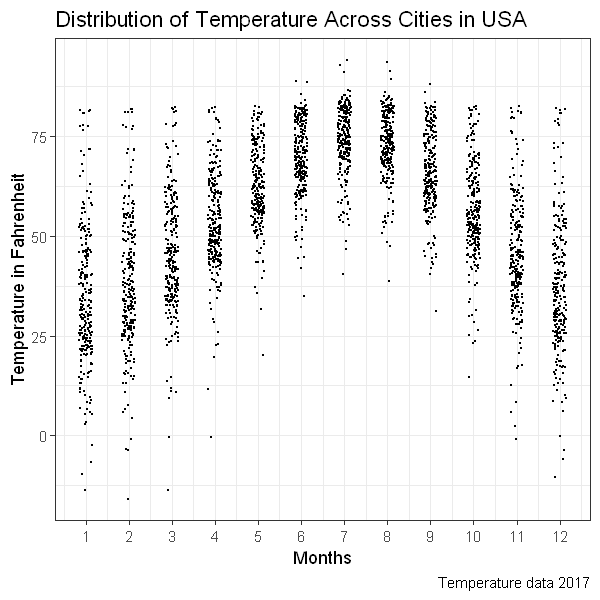

In [22]:
# Control Graph Size
options(repr.plot.width = 5, repr.plot.height = 5)
# Draw Scatter Plot
# 1. specify x and y
# 2. label each state
# 3. add in trend line
scatter <- ggplot(df_temp, aes(x=month, y=temp.f)) +
      geom_jitter(size=0.1, width = 0.15) +
      labs(title = 'Distribution of Temperature Across Cities in USA',
           x = 'Months',
           y = 'Temperature in Fahrenheit',
           caption = 'Temperature data 2017') +
      scale_x_continuous(labels = as.character(df_temp$month),
                         breaks = df_temp$month) +
      theme_bw()
print(scatter)

## Scatter Plot of Temperature and Months for 3 States

Now, we will generate a similar chart as above, but let's select three states, and use different colors for each of the three states.

We can see that there are differences in average temperature across cities in each state in each month, but the different states also have different levels of variations in city temperatures within months.

We want to calculate both mean and standard deviations to capture both differences in averages over the year, as well as differences in how temperature varies within a month over the year.

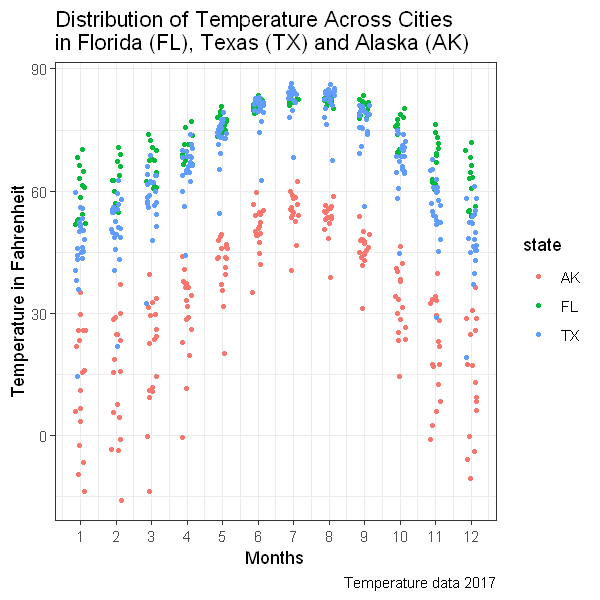

In [23]:
# Control Graph Size
options(repr.plot.width = 5, repr.plot.height = 5)
# First Filter Data
df_temp_txflak <- df_temp %>% filter(state %in% c('AK', 'TX', 'FL'))

# Draw Scatter Plot
# 1. specify x and y
# 2. label each state
# 3. add in trend line
scatter <- ggplot(df_temp_txflak, aes(x=month, y=temp.f,
                                      colour=state)) +
      geom_jitter(size=1, width = 0.15) +
      labs(title = 'Distribution of Temperature Across Cities\nin Florida (FL), Texas (TX) and Alaska (AK)',
           x = 'Months',
           y = 'Temperature in Fahrenheit',
           caption = 'Temperature data 2017') +
      scale_x_continuous(labels = as.character(df_temp$month),
                         breaks = df_temp$month) +
      theme_bw()
print(scatter)

## Mean and Standard Deviation Within Month Acorss USA

We can calculate the average temperature, as well as the standard deviation of temperature, in each month across cities in the USA. Let's show what these are using dplyr, and let's graph them out. 

It's pretty amazing what mean, and standard deviation can do for us. We started with a dataset with many many observations, many many temperatures. Now with just 24 numbers below, we have created a way to summarize the large set of observations concisely. Twelve numbers for means for the 12 months, and 12 numbers for the standard deviations in 12 months. 

This is like flying in the sky and taking a snapshot of the ground below from thousands of miles up. 

The exciting thing here is, which statistics should we generate to adequately summarize what is going on on the ground within all the data observations? In this case here, if we show the mean, it informatively indicates that temperature is hotter during the summer, but it does not show the tightening of the temperature distribution during the summer months that we see in the scatter plot above. Adding standard deviation to our summary statistics, however, allows us also to see that as well.

In [24]:
# Show mean and standard deviation in tabular form
df_temp_mth_summ <- df_temp %>% 
    group_by(month) %>%
    summarise(mean_temp = mean(temp.f), sd_temp = sd(temp.f))

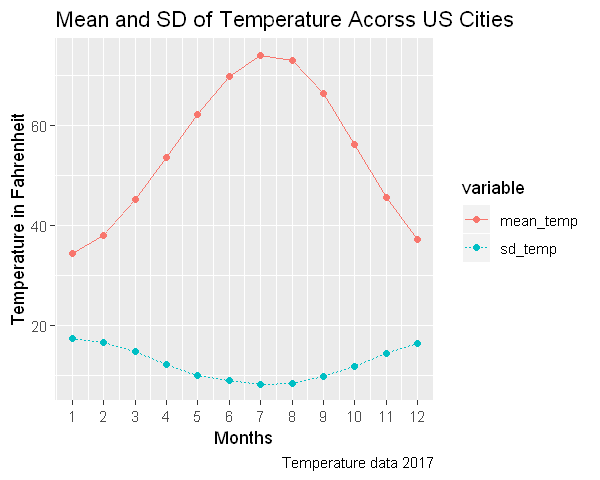

In [25]:
# Control Graph Size
options(repr.plot.width = 5, repr.plot.height = 4)
# Show mean and standard deviation in graphical form
# We will gather the data first, it is an essential reshaping command
lineplot <- df_temp_mth_summ %>% 
    gather(variable, value, -month) %>%
    ggplot(aes(x=month, y=value, colour=variable, linetype=variable)) +
        geom_line() +
        geom_point() +
        labs(title = 'Mean and SD of Temperature Acorss US Cities',
             x = 'Months',
             y = 'Temperature in Fahrenheit',
             caption = 'Temperature data 2017') +
        scale_x_continuous(labels = as.character(df_temp_mth_summ$month),
                           breaks = df_temp_mth_summ$month)
print(lineplot) 

## Mean and Standard Deviation Within Month Acorss States in USA

We have various states, how do these mean and sd charts vary across the big states that we have, where there are numerous cities in each state?

Let's generate some state-specific charts, using very simple commands below, and see how fascinating the United States is. 

Specifically, we will have two charts:
1. the first chart has 4 subplots for each state showing the mean and sd for each state across months
2. the second chart has 2 subplots, showing inside each four lines for the four states. 


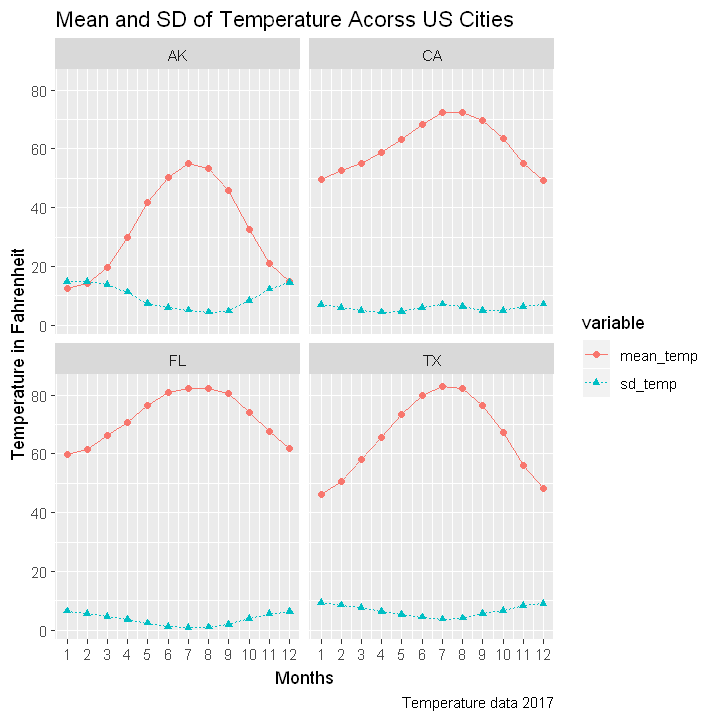

In [26]:
# Control Graph Size
options(repr.plot.width = 6, repr.plot.height = 6)
# Show mean and standard deviation in graphical form
# We start from the dataset:
# 1. select a subset of states we want
# 2. group by state and month to generate mean and sd
# 3. reshape data with gather
# 4. generate line plots, state by state

lineplot <- df_temp %>% 
    filter(state %in% c('AK', 'CA', 'FL', 'TX')) %>%
    group_by(state, month) %>%
    summarise(mean_temp = mean(temp.f), sd_temp = sd(temp.f)) %>% 
    gather(variable, value, -month, -state) %>%
    ggplot(aes(x=month, y=value,
               colour=variable, linetype=variable, shape=variable)) +
        facet_wrap( ~ state) + 
        geom_line() +
        geom_point() +    
        labs(title = 'Mean and SD of Temperature Acorss US Cities',
             x = 'Months',
             y = 'Temperature in Fahrenheit',
             caption = 'Temperature data 2017') +
        scale_x_continuous(labels = as.character(df_temp_mth_summ$month),
                           breaks = df_temp_mth_summ$month)
print(lineplot) 

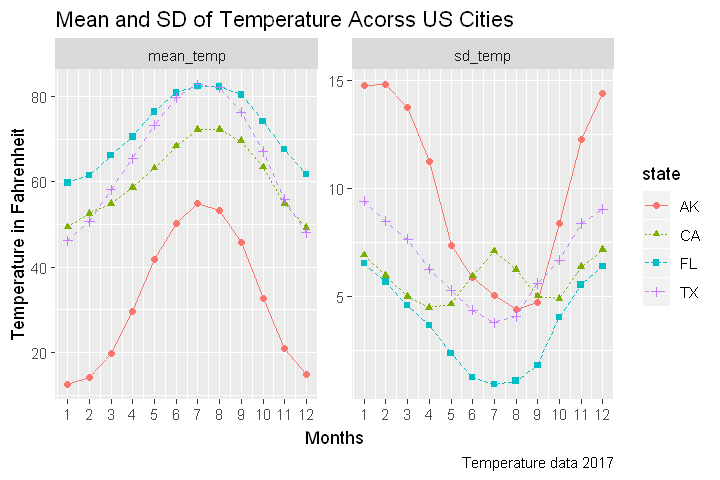

In [27]:
# Control Graph Size
options(repr.plot.width = 6, repr.plot.height = 4)
# Show mean and standard deviation in graphical form
# We start from the dataset:
# 1. select a subset of states we want
# 2. group by state and month to generate mean and sd
# 3. reshape data with gather
# 4. generate line plots, state by state

lineplot <- df_temp %>% 
    filter(state %in% c('AK', 'CA', 'FL', 'TX')) %>%
    group_by(state, month) %>%
    summarise(mean_temp = mean(temp.f), sd_temp = sd(temp.f)) %>% 
    gather(variable, value, -month, -state) %>%
    ggplot(aes(x=month, y=value,
               colour=state, linetype=state, shape=state)) +
        facet_wrap( ~ variable, scales="free_y") + 
        geom_line() +
        geom_point() +    
        labs(title = 'Mean and SD of Temperature Acorss US Cities',
             x = 'Months',
             y = 'Temperature in Fahrenheit',
             caption = 'Temperature data 2017') +
        scale_x_continuous(labels = as.character(df_temp_mth_summ$month),
                           breaks = df_temp_mth_summ$month)
print(lineplot) 